# Greedy Algorithmen

Gierige Algorithmen werden immer dann verwendet, wenn eine *Lösung auf direktem Weg* erreicht werden kann. Eine aktuell vorliegende *momentante Situation* (lokale Informationen) wird dabei *schrittweise verbessert*, d.h. der Algorithmus nimmt sich in jedem Schritt den "besten Happen" (greedy = gierig). Von einer einmal verbesserten Situation gibt es keinen Weg zurück: Kein Backtracking - das verspricht gute Effizienz. Es werden auch *keine Alternativen* betrachtet. Kann eine Situation nicht weiter verbessert werden, steht das Ergebnis fest.

Nicht alle Probleme können mit Greedy Algorithmen (exakt) gelöst werden. Aber oftmals sind Näherungslösungen machbar, die sehr effizient ermittelt werden können. In der Praxis ist die benötigte Zeit oft das wichtigere Kriterium. Im Folgenden werden einige Greedy-Algorithmen vorgestellt, die *exakte Lösungen* produzieren.

## Bruchteilrucksack

Im Gegensatz zum <a href="05 - Graphen.ipynb#0/1-Rucksack">0/1-Rucksackproblem</a>, ist es beim Bruchteilrucksack erlaubt, auch Bruchteile von Gegenständen einzupacken. Werden 80 Prozent eines Gegenstands eingepackt, heißt das nichts anderes als das 80 Prozent seines Gewichts den Rucksack belasten und 80 Prozent seines Wertes den Rucksackwert erhöhen.

Man kann den Rucksack exakt bis zu seiner Kapazitätsgrenze zu füllen. Es ist klar, dass Gegenstände mit hohem Wert und geringem Gewicht zu bevorzugen sind. Sortiert man die Gegenstände nach dem spezifischen Gewicht ($\frac{\text{Gewicht}}{\text{Wert}}$) aufsteigend, so erhält man eine priorisierte Liste. Der Gegenstand mit dem kleinsten spezifischen Gewicht ist der beste und steht deshalb ganz vorn, wird also als erster eingepackt (falls möglich). Durch das spezifische Gewicht werden die Gegenstände vergleichbar, denn es sagt aus, wie schwer der Gegenstand pro Werteinheit ist. *(Alternativ kann auch der spezifische Wert (Wert pro Gewichtseinheit) für eine absteigende Sortierung genutzt werden.)*  Die Gegenstände können nun, solange die Kapazitätsgrenze nicht überschritten wird, genau in der Reihenfolge ihrer Sortierung in den Rucksack gelegt werden. Der übrige Platz kann dann durch einen entsprechenden Bruchteil des nächsten Gegenstands aufgefüllt werden. Es wird an keiner Stelle ein Gegenstand wieder aus dem Rucksack entfernt und es gibt kein Probieren. Die Lösung wird direkt angesteuert.

In [9]:
import heapq # Priority Queue

def fracKnapsack(K, items):
    sort = []
    for item in items:
        heapq.heappush(sort,(item[0]/item[1],item)) # Gewicht/Wert
    knapsack = []
    weight = 0
    value = 0
    while len(sort):
        (sw,item) = heapq.heappop(sort)
        if weight + item[0] <= K: # passt vollständig in den Rucksack
            knapsack.append(item)
            weight += item[0]
            value += item[1]
        else: # Bruchteil in den Rucksack aufnehmen
            v = (K-weight)/sw # Verbleibender Wert des Bruchteils
            knapsack.append((K-weight,v))
            weight += K-weight
            value += v
            break # Rucksack ist voll
    return (knapsack, weight, value)

items = [(4, 7),(9, 1),(6, 9), (8, 6), (3, 1), (2, 5), (8, 7)] # (Gewicht, Wert)
print(fracKnapsack(15, items))

([(2, 5), (4, 7), (6, 9), (3, 2.625)], 15, 23.625)


**Hinweis:** Das 0/1 Rucksackproblem ist mit der Greedy Strategie nicht (exakt) lösbar. Die Gegenstände nach ihrem spezifischen Gewicht nacheinander einzupacken führt hier nicht immer zum optimalen Rucksack. Stünden z.B. ein Diamant (Wert 1000, Gewicht 90) und fünf Goldmünzen (jeweils Wert 210, Gewicht 20) für einen Rucksack, der ein Gewicht von 100 tragen kann, zur Auswahl, würde der Greedy Algorithmus den Diamanten einpacken und einen Rucksackwert von 1000 erreichen. Die exakte Lösung besteht jedoch darin, stattdessen die fünf Goldmünzen zu nehmen (Wert 5 x 210 = 1050).

## Geldwechselproblem

Beim <a name="geldwechsel">Geldwechselproblem</a> kann ganz ähnlich vorgegangen werden wie beim Bruchteilrucksack. Hier geht es darum, einen Geldbetrag in möglichst wenige Münzen einzutauschen. Der Betrag kann hier wie die Maximalkapazität beim Rucksackproblem behandelt werden. Die möglichen Münzen stellen bei dieser Analogie die Gegenstände dar. Der einzige Unterschied besteht darin, dass Münzen mehrfach ausgewählt werden können.

Nach absteigender Sortierung der möglichen Münzwerte wird nach und nach versucht den jeweils größten vom aktuellen Betrag abzuziehen. Wenn dies möglich ist, so wird die Münze dem Ergebnis hinzugefügt. Anderenfalls wird die Münze mit diesem Wert aus der Kandidatenliste entfernt, sodass im nächsten Durchlauf der nächstkleinere Münzwert verwendet wird. Das folgende Programm zeigt auch, dass eine rekursive Implementation von Greedy Algorithmen möglich ist.

In [10]:
def currencyExchangeRec(balance, candidates):
    if balance == 0:
        return []
    if (balance >= 0) and (len(candidates) == 0):
        return ['Failed']
    else:
        if balance >= candidates[0]:
            temp = [candidates[0]]
            return temp + currencyExchangeRec((balance - candidates[0]), candidates)
        else:
            return currencyExchangeRec(balance, candidates[1:])

def currencyExchange(balance, candidates):
    res = currencyExchangeRec(balance, candidates)
    if res[len(res)-1] == 'Failed':
        print('No exchange possible.')
    else:
        print(res)
        print(len(res))

balance = 988 #The value of the whole amount of money you want to change
candidates = [200, 100, 50, 20, 10, 5, 2, 1] #The value of each coin, e.g. 2€, 1€, 50ct...

currencyExchange(balance, candidates)

[200, 200, 200, 200, 100, 50, 20, 10, 5, 2, 1]
11


Für das Geldwechselproblem gibt es neben dem hier behandelten Greedy-Algorithmus auch ein Verfahren nach dem Prinzip des <a href="09 - Dynamic Programming.ipynb#geldwechsel">Dynamischen Programmierens</a>.

## <a name="MST">Minimal aufspannender Baum (MST)</a>

Die beiden folgenden Algorithmen erzeugen zu jedem zusammenhängenden kantengewichteten Graphen einen minimalen Spannbaum.

Zur Wiederholung: Ein *aufspannender Baum eines zusammenhängenden Graphen* $G=(E,V)$ ist ein Baum, d.h. ein kreisfreier und zusammenhängender Teilgraph $G'=(V',E')$ mit $V'=V$ und $E'\subseteq E$. "kreisfrei" bedeutet eine Knotenfolge ohne Knotenwiederholung mit Ausnahme des Start- und Endeknotens.

Intuitiv kann man sich einen Spannbaum als einen Graph vorstellen, dessen sämtliche Knoten mit "angehoben" werden, wenn man genau einen beliebigen Knoten "hochhebt", ohne dass überflüssige Kanten existieren. Praktische Anwendungen gibt es: So sollte der Leitungsweg bei einer bestimmten Verkabelung bei Erreichung aller Knoten (Orte) minimal sein, um Kosten zu sparen.

Dabei kommt der *Minimal aufspannender Baum* (= minimal spanning tree = MST) ins Spiel. Das Gesamtgewicht des MST soll minimal sein. (Das Ganze gibt es auch in der Maximalvariante, dann aber mit anderer praktischer Anwendung!)

**Beispiel**: Beide Verfahren werden auf den folgenden Graphen angewandt.
<img src="img/prim03.png" width="400" />

### KRUSKAL-Algorithmus

Das auf Joseph KRUSKAL (1956) zurückgehende Verfahren zur Bestimmung des MST beginnt mit der Übernahme aller Knoten von $G$. Danach werden die Kanten nach ihrem Gewicht aufsteigend sortiert. Schließlich werden die Kanten schrittweise hinzugefügt, sofern dabei kein Kreis (s. auch <a href="05 - Graphen.ipynb#Zyklus">`zyklussuche`</a>) entsteht. Würde sich ein Kreis ergeben, wird die betreffende Kante übergangen und die jeweils nächste verwendet. Haben mehrere Kanten das gleiche Gewicht, kann eine davon zufällig ausgewählt werden.

Das Verfahren arbeitet mit $\mathcal{O}(|E|\log(|E|))$, wobei $|E|$ die Anzahl der Kanten des Graphen bedeutet. Ist die Prüfung auf Kreisfreiheit geeignet implementiert, so schlägt vor allem die Sortierung ins Gewicht, was den o.g. Wert ergibt. Besitzt ein Graph sehr viele Kanten, so ist der *Algorithmus von Prim* (nächster Abschnitt) vorzuziehen, da er ohne Sortierung auskommt.

**Beispiel**: Die folgenden nach ihrem Gewicht aufsteigend sortierten Kanten werden dem Graph schrittweise hinzugefügt. Die Kanten, die zu einem Kreis führen würden, sind mit eckigen Klammern gekennzeichnet.

    AH-16, CD-17, BH-19, AC-26, FH-28, [BD-29], [BF-32], [HC-34], EF-35, 
    [BC-36], [EH-37], [AE-38], CG-40, [DG-52], [AG-58], [EG-93]

Im Ergebnis erhalten wir den folgenden MST für den oben angegebenen Graphen. Das minimale Gesamtgewicht beträgt 181.
<img src="img/prim04.png" width="400" />

### Algorithmus von Prim

Der Algorithmus wurde 1930 vom tschechischen Mathematiker Vojtěch *Jarník* entwickelt. 1957 wurde er zunächst von Robert C. *Prim* und dann 1959 von Edsger W. *Dijkstra* wiederentdeckt. Dieses Greedyverfahren hat Ähnlichkeiten mit der Breitensuche (und mit dem weiter unten betrachteten Dijkstra-Algorithmus).

Der Algorithmus beginnt mit einem trivialen Graphen $T$, der zunächst aus einem *beliebigen* Knoten des gegebenen Graphen $G=(V,E)$ besteht. In jedem Schritt wird eine inzidierende Kante mit minimalem Gewicht gesucht, die einen weiteren (bisher noch nicht zu $T$ gehörenden) Knoten mit einem zu $T$ gehörenden verbindet. Diese Kante und der zugehörige Knoten werden zu $T$ hinzugefügt. Das Ganze wird solange wiederholt, bis alle Knoten $V$ in $T$ vorhanden sind; dann ist $T$ ein minimaler Spannbaum. (Natürlich gibt es eine formale Beweispflicht für die Korrektheit des Verfahrens.)

Im Unterschied zum Kruskal-Algorithmus, bei dem die Kreisfreiheit explizit geprüft wird, vermeidet Prim die Bildung von Kreisen konstruktiv. Beim Prim-Algorithmus muss der sich aufbauende Teilgraph (MST) zu jedem Zeitpunkt zusammenhängen.

Der Gesamtaufwand des Verfahrens (bei geschickter Implementierung der Prioritätswarteschlange mit Fibonacci-Heaps) beträgt $\mathcal{O}(|E|+|V|\log |V|)$ mit Bezug auf den gegebenen Graphen $G=(V,E)$.

**Beispiel**: Für den weiter oben gegebenen Graphen soll ein MST berechnet werden. Die folgende Übersicht zeigt die einzelnen Schritte bis alle Knoten in die Knotenmenge des MST gewandert sind.
Links vermerken wir die als nächste einbezogene Kante, danach den hinzugefügten Knoten und rechts sind die im nächsten Schritt infrage kommenden Kanten (zusammen mit ihrem Gewicht) angegeben. Die zur Benennung einer (ungerichteten) Kante verwendete Knotenreihenfolge spielt keine Rolle. 
Der Startknoten ist beliebig wählbar; wir beginnen bei $A$.

    AH-16  A:  AE-38, AH-16, AC-26, AG-58
    HB-19  H:  HE-37, HF-28, HB-19, HC-34, AE-38, AH-16, AC-26, AG-58
    AC-26  B:  BF-32, BC-36, BD-29, HE-37, HF-28, HC-34, AE-38, AC-26, AG-58
    CD-17  C:  CD-17, CG-40, BF-32, HE-37, HF-28, AE-38, AG-58
    HF-28  D:  DG-52, CG-40, BF-32, HE-37, HF-28, AE-38, AG-58
    FE-35  F:  FE-35, DG-52, CG-40, HE-37, AE-38, AG-58
    CG-40  E:  DG-52, CG-40, AG-58
           G:
Im Ergebnis erhalten wir den folgenden MST für den oben angegebenen Graphen. Das minimale Gesamtgewicht beträgt 181.
<img src="img/prim02.png" width="400" />


## Kürzeste Wege

### Algorithmus von Dijkstra

Der **Dijkstra-Algorithmus** zur Suche nach kürzesten Wegen zwischen zwei Knoten ist auf un/gerichtete und un/gewichtete zusammenhängende Graphen anwendbar, wenn sämtliche ggf. vorhandenen Kantengewichte nichtnegativ sind. Für die Suche nach kürzesten Wegen in Graphen, die auch negative Kantengewichte haben können, eignet sich der <a href="09 - Dynamic Programming.ipynb#BellFordAlg">Bellman-Ford-Algorithmus</a>. Dieser beruht auf dem algorithmischen Entwurfskonzept des <a href="09 - Dynamic Programming.ipynb#dynProg">Dynamischen Programmierens</a>. Der *Algorithmus von Dijkstra* folgt der *Greedy-Strategie*, ein momentanes Zwischenergebnis durch Hinzunahme "des jeweils besten Happens" schrittweise zu verbessern. 

Als Nebenprodukt erhält man *alle* kürzesten Wege von einem gewählten Startknoten zu jedem anderen Knoten des Graphen.

Im Gegensatz zum *TSP* (Traveling Salesman Problem), wo eine kürzeste *Rundreise* (im Graphen als Kreis zu finden) gesucht wird, ist das Finden des kürzesten Weges zwischen zwei Knoten eines (gerichteten oder ungerichteten) gewichteten Graphen *recht effizient* in $\mathcal{O}(|V|^2)$ möglich. Wählt man *Fibonacci-Heaps* für die Implementation der *Prioritätswarteschlange*, ergibt sich ein Aufwand von $\mathcal{O}(|E|+|V|\log(|V|))$. 

#### Beschreibung des Dijkstra-Algorithmus - Variante 1 

Wir geben zunächst eine *studentische* Erklärung des Verfahren an einem Beispiel. Weiter unten folgt eine alternative Beschreibung des Algorithmus' zusammen mit einer Empfehlung zur dynamischen Knotenmarkierung. Dabei wird ein weiteres Beispiel verwendet.

**Beispiel**: In folgendem Graph soll der kürzeste Weg von A nach E gefunden werden.
<img src="img/Greedy_Graph.png" width="300">

Ausgehend vom Startpunkt A werden zunächst alle (adjazenten) Nachbarknoten ermittelt und an diesen die Länge des Weges von A bis dorthin  hinterlegt (Bild a). Zusätzlich merkt man sich den Vorgängerknoten von dem aus dieser Weg beschritten wurde (rote Pfeile). Im weiteren Verlauf wird nun unter den noch nicht verarbeiteten Knoten der mit dem kürzesten hinterlegten Weg untersucht (*das beste momentane Zwischenergebnis*, in Bild b Knoten C) und dessen angrenzende Knoten ermittelt (nur Knoten D, da A bereits verarbeitet wurde). Der am untersuchten Knoten hinterlegte Weg (der kürzeste Weg vom Startknoten bis dahin, bei Knoten C die Länge 2), erweitert um den Weg bis zum angrenzenden Knoten (3 bis nach D), wird nun mit dem am angrenzenden Knoten hinterlegten Weg (der kürzeste Weg vom Startknoten bis zu diesem) verglichen. Gibt es noch keinen hinterlegten Wert, so kann die momentan berechnete Länge gespeichert werden (in Bild b Speicherung von 5 zu Knoten D). Ist der momentane Weg kürzer als der bereits am angrenzenden Knoten hinterlegte Weg, dann wird dieser ersetzt (*Verbesserung des Zwischenergebnisses*, in Bild c passiert das mit Knoten B). Im gleichen Zuge wird auch der Vorgänger entsprechend geändert. Bild d zeigt, dass genau das Gleiche bei Knoten E passiert.

<img src="img/Greedy_Dijkstra.png" width="700">

Sobald der Zielknoten derjenige mit dem geringsten hinterlegten Weg ist, ist klar, dass dieser der Knoten mit der momentan kürzesten Distanz zum Startknoten ist. Es kann demzufolge keine kürzere Distanz zum Startknoten geben und der kürzeste Weg (hier von A nach E: A-C-D-B-E) ist gefunden. Da an jedem Knoten der Vorgänger hinterlegt wurde von dem aus dieser kürzeste Weg zustande gekommen ist, kann durch Verfolgung der Vorgänger bis hin zum Startknoten der Weg rekonstruiert werden. Schlussendlich wird bei dieser Vorgehensweise jeder Knoten nur maximal ein Mal untersucht und bei jedem Besuch werden nur die noch nicht untersuchten Knoten aktualisiert, sofern sie vom aktuellen Knoten aus überhaupt erreichbar sind.

Folgendes Programm nutzt eine Entfernungsmatrix, um den Graphen zu repräsentieren. Diese enthält in jedem Feld die Entfernung von einem Ausgangsknoten (Zeilenindex) zu einem Zielknoten (Spaltenindex). Für Knoten die keine direkte Verbindung haben, wird eine Entfernung von Unendlich (`inf`) definiert. In der nach der hinterlegten Distanz sortierten Ausgangsknotenliste `nodes` wird der Startknoten mit einer Distanz von 0 markiert, sodass in der äußeren `while` Schleife mit diesem begonnen wird. Solange der Knoten mit der kürzestesten Distanz zum Startknoten (`n`) noch nicht der Zielknoten (Knotenindex `end`) ist, werden die verbleibenden Knoten (`nn`) aktualisiert. Durch Nutzung von `heapq` werden die verbleibenden Knoten (`nodes`) stets nach ihrer hinterlegten Mindestdistanz zum Startknoten sortiert.

In [11]:
import heapq # Priority Queue
inf = float("inf")
distanceMatrix = [
#nach A ,  B ,  C ,  D ,  E
    [inf,  11,   2, inf, inf], # von A
    [ 11, inf, inf,   5,   1], # von B
    [  2, inf, inf,   3, inf], # von C
    [inf,   5,   3, inf,   8], # von D
    [inf,   1, inf,   8, inf]  # von E
]
def shortestPathDijkstra(matrix, start, end):
    # für alle Knoten (Distanz, (Knotenindex, Vorgängerknoten)
    # Distanz = inf außer beim Start-Knoten, Vorgänger=None
    nodes = [(inf if i != start else 0, (i, None)) for i in range(len(matrix))]
    heapq.heapify(nodes)  # Heap-sortiert nach Distanz
    while len(nodes):  # Solange es nicht verarbeitete Knoten gibt
        n = heapq.heappop(nodes)  # Knoten mit der geringsten Distanz
        if n[1][0] == end:  # Index des Endknoten erreicht?
            result = [n[1][0]]  # Weg endet mit Endknoten
            r = n[1][1]  # Vorgänger auf dem Weg zum Endknoten
            while r:  # solange es noch Vorgänger gibt
                result = [r[0]] + result  # Weg um Vorgänger erweitern
                r = r[1]  # dessen Vorgänger ermitteln
            return (result, n[0])  # (Weg von start zu end, Länge)
        nextnodes = []  # Update der übrigen Knoten
        for nn in nodes:  # für alle noch nicht verarbeiteten Knoten
            if n[0] + matrix[n[1][0]][nn[1][0]] < nn[0]:  # kürzer von start zu nn?
                # Distanz und Vorgänger aktualisieren
                heapq.heappush(nextnodes, (n[0] + matrix[n[1][0]][nn[1][0]], (nn[1][0], n[1])))
            else: # anderenfalls unverändert in priority-queue übernehmen
                heapq.heappush(nextnodes, nn)
        nodes = nextnodes # aktualisierte Knoten für den nächsten Durchlauf
    return "bad input"

print(shortestPathDijkstra(distanceMatrix, 0, 4))

([0, 2, 3, 1, 4], 11)


Folgendes Programm nutzt den Dijkstra Algorithmus, um die kürzeste Verbindung zweier Punkte in einem Graphen zu finden. Graphen werden hier zufällig generiert und grafisch dargestellt, sodass eine visuelle Kontrolle erfolgen kann.

[(0, 4, 21.36559722518614), (1, 7, 20.636780771089974), (2, 0, 14.431957646169582), (3, 5, 5.811009620513439), (4, 5, 10.488673985432143), (5, 2, 6.949338887257578), (6, 3, 13.474062921115692), (7, 6, 14.665356654352365), (8, 3, 5.614742228373637), (9, 2, 8.62620628087281)]
([0, 2, 9], 23.058163927042393)


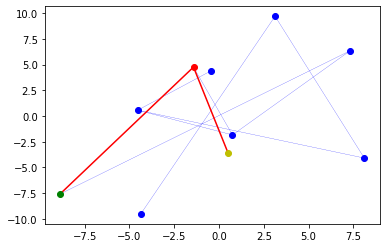

In [12]:
import matplotlib.pyplot as plt
import random, math

# Graph-Generator ----------------------------------------
def generateGraph(numberOfPoints, maxConnections):
    points = []  # (x,y), Name = Index
    edges = []  # (indexPoint1, indexPoint2, weight)
    if maxConnections < 1:
        maxConnections = 1

    for i in range(numberOfPoints):
        points.append((random.uniform(-10, 10), random.uniform(-10, 10)))

    def getPossibleConnections(edges, x, length):
        tempResult = []
        result = []
        for edge in edges:
            if edge[1] == x:
                tempResult.append(edge[0])
        for i in range(0, length):
            if i not in tempResult and i != x:
                result.append(i)
        return result

    def calcDistance(point1, point2):
        a = abs(point1[0] - point2[0])
        b = abs(point1[1] - point2[1])
        c_2 = a * a + b * b
        return math.sqrt(c_2)


    for i in range(len(points)):
        k = 0
        possibleConnections = getPossibleConnections(edges, i, len(points))
        n = round(random.uniform(1, maxConnections))
        while k < n:
            j = possibleConnections[round(random.uniform(0, len(possibleConnections)-1))]
            edges.append((i, j, calcDistance(points[i], points[j])))
            possibleConnections.remove(j)
            k = k + 1
    return (points, edges)

def pointsAndEdgesToDistanceMatrix(points, edges):
    m = [[inf for _ in points] for _ in points]
    for e in edges:
        m[e[0]][e[1]] = m[e[1]][e[0]] = e[2]
    return m

# Execution ------------------------------------------------------------

(points, edges) = generateGraph(10,1)
print(edges)
distanceMatrix = pointsAndEdgesToDistanceMatrix(points, edges)
dijkstraResult = shortestPathDijkstra(distanceMatrix, 0, len(points) - 1)
print(dijkstraResult)
dijkstraWay = dijkstraResult[0]

# Plotting -----------------------------------------------------------

fig = plt.subplot()

pointsX = []
pointsY = []

for point in points:
    pointsX.append(point[0])
    pointsY.append(point[1])

for edge in edges:
    tempX = [points[edge[0]][0], points[edge[1]][0]]
    tempY = [points[edge[0]][1], points[edge[1]][1]]
    fig.plot(tempX, tempY, "r", color="blue", linewidth="0.2")

dijkstraPointsX = []
dijkstraPointsY = []

for index in dijkstraWay:
    dijkstraPointsX.append(points[index][0])
    dijkstraPointsY.append(points[index][1])

fig.plot(dijkstraPointsX, dijkstraPointsY, "r", color="red")

for i in range(0, len(pointsX)):
    if i in dijkstraWay:
        if i == dijkstraWay[0]:
            fig.plot(pointsX[i], pointsY[i], "go")
        else:
            if i == dijkstraWay[len(dijkstraWay)-1]:
                fig.plot(pointsX[i], pointsY[i], "yo")
            else:
                fig.plot(pointsX[i], pointsY[i], "ro")
    else:
        fig.plot(pointsX[i], pointsY[i], "bo")

plt.show()


#### Beschreibung des Dijkstra-Algorithmus - Variante 2

**Beispiel**: Gegeben ist der folgende ungerichtete Graph mit den angegebenen Kantengewichten.
Gesucht ist der kürzeste Weg von $S$ nach $Z$.
<img src="img/Dijkstra01.png" width="400" />

Die in den Knoten hinzugefügten Markierungen $(e,X)$ geben die Länge $e$ des bisher kürzesten Weges vom Startknoten $S$ zum Knoten $X$ an. Nach der Initialisierung ergeben sich die folgenden Markierungen.
<img src="img/Dijkstra02.png" width="400" />
Für die Nachbarknoten ($A$, $B$ und $C$) von $S$ ergeben sich die nun folgenden Markierungen.
<img src="img/Dijkstra04.png" width="400" />
Aus diesen Nachbarknoten wählt man den mit der geringsten Entfernung (dem kürzesten Weg) zu $S$. Das ist $A$ in unserem Beispiel. Dieser nun *aktuelle Knoten* wird (blau) gefärbt.
Nun werden die Markierungen der noch ungefärbten Nachbarn ($B$ und $D$) des aktuellen Knotens aktualisiert. Die $(6,S)$-Markierung von $B$ muss der $(5,A)$-Markierung weichen, denn der Weg von $S$ über $A$ zu $B$ ist kürzer ($5$) als der direkte ($6$).
<img src="img/Dijkstra05.png" width="400" />
Für den nächsten aktuellen Knoten gibt es zwei Kandidaten, nämlich $B$ und $C$, denn beide haben die gleiche minimale Distanz ($5$) zu $S$. Die Entscheidung kann zufällig oder auch implementationsabhängig stattfinden. Wir wählen $B$. Die noch ungefärbten Nachbarknoten von $B$ sind $C$, $D$ und $E$. Eine neue Markierung für $C$ wird nicht vorgenommen, da die bestehende mit $(5,S)$ besser ist als $(7,A)$, d.h. der direkte Weg von $S$ zu $C$ ist kürzer als der Weg über $A$.
<img src="img/Dijkstra06.png" width="400" />
Weiter geht es mit $C$, der die Markierung von $E$ nicht beeinflusst. 
<img src="img/Dijkstra07.png" width="400" />
Im nächsten Schritt ist $E$ der aktuelle Knoten. Dessen Nachfolgerknoten $Z$ erhält jetzt eine neue Markierung, nämlich $(17,E)$.
<img src="img/Dijkstra08.png" width="400" />
Und schließlich kommt $D$ an die Reihe. Dessen Nachfolgerknoten $Z$ verbessert sich zu $(16,D)$.
<img src="img/Dijkstra09.png" width="400" />

Damit ist klar, dass der kürzeste Weg von $S$ zu $Z$ genau $16$ beträgt. Man kann ihn leicht rekonstruieren, indem man die Knotenmarkierungen rückwärts, d.h. bei $Z$ beginnend, verfolgt. Aus den Knotenmarkierungen geht ja der jeweilige Vorgängerknoten unmittelbar hervor.
$S\rightarrow A\rightarrow B\rightarrow D\rightarrow Z$ bzw. $S\rightarrow A\rightarrow B\rightarrow E\rightarrow D\rightarrow Z$. Die Addition der Gewichte der einbezogenen Kanten ergibt gerade $16$.

Als Nebenprodukt ergeben sich die Längen aller minimalen Wege von $S$ zu je einem Knoten:

       S  A  C  B  D   E  Z
    ------------------------
    S  0  4  5  5  10  9  16
            
Die Länge des kürzesten Weges von $S$ zu $D$ beträgt also $10$.
            


**Übungsaufgabe 1**: Ermitteln Sie den kürzesten Weg von $S$ zu $Z$ mit dem Dijkstra-Algorithmus und geben Sie dessen Länge an.
<img src="img/Dijkstra10.png" width="400" />
*Lösung*: Der Weg $S\rightarrow B\rightarrow A\rightarrow C\rightarrow E\rightarrow Z$ hat eine Länge von $19$. 

**Übungsaufgabe 2**: Ermitteln Sie den kürzesten Weg von $S$ zu $Z$ mit dem Dijkstra-Algorithmus und geben Sie dessen Länge an.
<img src="img/Dijkstra11.png" width="400" />
*Lösung*: Der Weg $S\rightarrow G\rightarrow D\rightarrow F\rightarrow Z$ hat eine Länge von $29$. 